# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [5]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from sklearn import metrics
from sklearn import datasets
import seaborn as sn
%matplotlib inline

In [6]:
#Load data
credit_df = pd.read_excel('German_Credit.xlsx')

In [7]:
#Print header of the file
credit_df.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


# 2. Check how many records do we have


In [8]:
credit_df.shape

(1000, 3)

# 3. Plot Histogram for column 'CreditAmount'

(array([ 26.,  87., 124., 121.,  87.,  84.,  63.,  54.,  43.,  49.,  31.,
         24.,  19.,  16.,   7.,  16.,  22.,  14.,  11.,  17.,  13.,   7.,
          7.,   4.,   7.,   5.,   2.,   5.,   3.,   4.,   1.,   4.,   4.,
          2.,   3.,   1.,   0.,   2.,   3.,   2.,   1.,   0.,   3.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  250.  ,   613.48,   976.96,  1340.44,  1703.92,  2067.4 ,
         2430.88,  2794.36,  3157.84,  3521.32,  3884.8 ,  4248.28,
         4611.76,  4975.24,  5338.72,  5702.2 ,  6065.68,  6429.16,
         6792.64,  7156.12,  7519.6 ,  7883.08,  8246.56,  8610.04,
         8973.52,  9337.  ,  9700.48, 10063.96, 10427.44, 10790.92,
        11154.4 , 11517.88, 11881.36, 12244.84, 12608.32, 12971.8 ,
        13335.28, 13698.76, 14062.24, 14425.72, 14789.2 , 15152.68,
        15516.16, 15879.64, 16243.12, 16606.6 , 16970.08, 17333.56,
        17697.04, 18060.52, 18424.  ]),
 <a list of 50 Patch objects>)

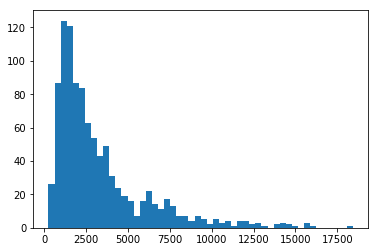

In [9]:
plt.hist(credit_df['CreditAmount'], 50)

In [10]:
amountIntervalsPoints = np.array([0, 500, 1000,1500,2000, 2500, 5000, 7500, 10000, 15000, 20000])
amountIntervals = [(amountIntervalsPoints[i] + int(i != 0), amountIntervalsPoints[i + 1]) for i in np.arange(len(amountIntervalsPoints) - 1)]
amountIntervals

[(0, 500),
 (501, 1000),
 (1001, 1500),
 (1501, 2000),
 (2001, 2500),
 (2501, 5000),
 (5001, 7500),
 (7501, 10000),
 (10001, 15000),
 (15001, 20000)]

In [11]:
amountIntervalsDf = pd.DataFrame(amountIntervals, columns = ['intervalLeftSide', 'intervalRightSide'])
amountIntervalsDf

,intervalLeftSide,intervalRightSide
0,0,500
1,501,1000
2,1001,1500
3,1501,2000
4,2001,2500
5,2501,5000
6,5001,7500
7,7501,10000
8,10001,15000
9,15001,20000


In [12]:
#Credibility table preparation
Credibility0 = []
Credibility1 = []
for interval in amountIntervals:
    subData = credit_df[credit_df.CreditAmount >= interval[0]]
    subData = subData[subData.CreditAmount <= interval[1]]
    Credibility0.append(sum(subData.Creditability == 0))
    Credibility1.append(sum(subData.Creditability == 1))

# 3. Create creditability dataframe

In [13]:
tempDf = pd.DataFrame(np.column_stack([Credibility0, Credibility1]), columns = ['Credibiliity0', 'Credibiliity1'])
tempDf

,Credibiliity0,Credibiliity1
0,3,15
1,34,64
2,51,139
3,33,93
4,26,79
5,75,200
6,34,68
7,20,26
8,21,14
9,3,2


# 4. Concatenate the above 2 dataframes and give the total of Credibiliity0 and Credibiliity1

In [14]:
compareCreditWorthinessDf = pd.concat([amountIntervalsDf.reset_index(drop=True), tempDf], axis=1)
compareCreditWorthinessDf
compareCreditWorthinessDf['total'] = compareCreditWorthinessDf.Credibiliity0 + compareCreditWorthinessDf.Credibiliity1
compareCreditWorthinessDf

,intervalLeftSide,intervalRightSide,Credibiliity0,Credibiliity1,total
0,0,500,3,15,18
1,501,1000,34,64,98
2,1001,1500,51,139,190
3,1501,2000,33,93,126
4,2001,2500,26,79,105
5,2501,5000,75,200,275
6,5001,7500,34,68,102
7,7501,10000,20,26,46
8,10001,15000,21,14,35
9,15001,20000,3,2,5


# 5. Plot Creditworthiness plot for Credibility == 0 and also ==1

Text(0.5, 1.0, 'Creditworthiness plot for Credibility == 0')

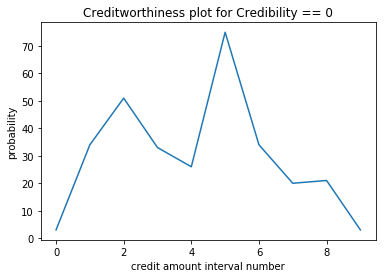

In [17]:
plt.plot(compareCreditWorthinessDf.Credibiliity0)
plt.xlabel('credit amount interval number')
plt.ylabel('probability')
plt.title("Creditworthiness plot for Credibility == 0")

Text(0.5, 1.0, 'Creditworthiness plot for Credibility == 1')

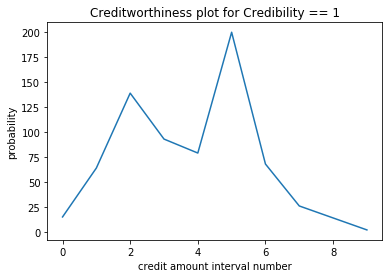

In [18]:
plt.plot(compareCreditWorthinessDf.Credibiliity1)
plt.xlabel('credit amount interval number')
plt.ylabel('probability')
plt.title("Creditworthiness plot for Credibility == 1")

# 6. Prepare input data for the model

In [19]:
X = np.array(credit_df.CreditAmount)
Y = credit_df.Creditability.astype('category')

# 7. Fit logistic regression model

In [20]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 42 )
logit = sm.Logit( y_train, sm.add_constant( X_train ) )
lg = logit.fit()
lg.summary2()

Optimization terminated successfully.
         Current function value: 0.598243
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.017     
Dependent Variable: Creditability    AIC:              841.5402  
Date:               2019-08-08 18:52 BIC:              850.6424  
No. Observations:   700              Log-Likelihood:   -418.77   
Df Model:           1                LL-Null:          -425.90   
Df Residuals:       698              LLR p-value:      0.00015977
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const      1.2287     0.1307    9.4037   0.0000    0.9726    1.4848
x1        -0.0001     0.0000   -3.7764   0.0002   -0.0002   -0.0001
=================================================================

"""

# 8. Test accuracy calculation

In [21]:
def get_predictions( y_test, model ):
    y_pred_df = pd.DataFrame( { 'actual': y_test,
                               "predicted_prob": lg.predict( sm.add_constant( X_test ) ) } )
    return y_pred_df

X_test[0:5]

array([10974,  1149,  1736,  1414,  2978], dtype=int64)

In [22]:
y_pred_df = get_predictions(X_test, lg )
y_pred_df['originalCredibility'] = np.array(y_test)
y_pred_df[0:5]

,actual,predicted_prob,originalCredibility
0,10974,0.515795,0
1,1149,0.751504,1
2,1736,0.739680,1
3,1414,0.746211,1
4,2978,0.713492,1


In [23]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.6 else 0)
y_pred_df[0:10]

,actual,predicted_prob,originalCredibility,predicted
0,10974,0.515795,0,0
1,1149,0.751504,1,1
2,1736,0.739680,1,1
3,1414,0.746211,1,1
4,2978,0.713492,1,1
5,2728,0.718888,1,1
6,2859,0.716068,1,1
7,3832,0.694598,1,1
8,727,0.759779,0,1
9,1318,0.748137,1,1


# 9. Build a confusion matrix

In [24]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Default", "No Default"] , yticklabels = ["Default", "No Default"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

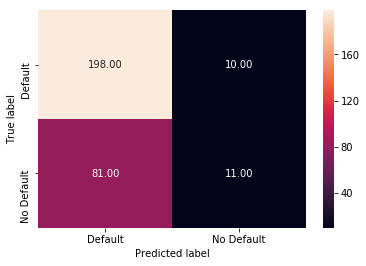

In [25]:
draw_cm( y_pred_df.originalCredibility, y_pred_df.predicted )

In [26]:
print( 'Total Accuracy : ',np.round( metrics.accuracy_score( y_test, y_pred_df.predicted ), 2 ) )

Total Accuracy :  0.7


# 10.  Predicted Probability distribution Plots for Defaults and Non Defaults

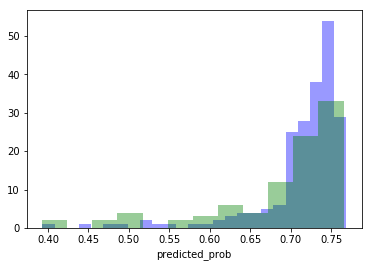

In [27]:
sn.distplot( y_pred_df[y_pred_df.originalCredibility == 1]["predicted_prob"], kde=False, color = 'b' )
sn.distplot( y_pred_df[y_pred_df.originalCredibility == 0]["predicted_prob"], kde=False, color = 'g' )